In [24]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 20, "display.max_columns", 60)

In [3]:
def read_file(file_name):
    return pd.read_csv(file_name)
    # для заархивированных файлов
    # df = pd.read_csv(dataset[year], chunksize=chanksize, compression='gzip')

In [4]:
file_name = "Data/[3]flights.csv"
read_file(file_name)

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_18048/764762243.py:2: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  read_file(file_name)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def get_memory_stat_by_column(df, output_file):
    # вывод пар: колонка - тип данных
    memory_usage_stat = df.memory_usage(deep=True)
    # суммарный размер
    total_memory_usage = memory_usage_stat.sum()
    result = {
        "file_in_memory_size": f"{int(total_memory_usage // 1024):10} KB",
        "columns": []
    }
    # проходимся по колонкам, записываем в список
    for key in df.dtypes.keys():
        result["columns"].append({
            "column_name": key,
            "memory_abs": int(memory_usage_stat[key] // 1024),
            "memory_per": round(memory_usage_stat[key] / total_memory_usage * 100, 4),
            "dtype": str(df.dtypes[key])
        })
    # отсортируем колонки
    result["columns"].sort(key=lambda x: x['memory_abs'], reverse=True)
    # Запись в файл JSON
    with open(output_file, 'w') as file:
        json.dump(result, file)

In [6]:
file_name = "Data/[3]flights.csv"
dataset = read_file(file_name)
output_file = "результаты_3.json"
get_memory_stat_by_column(dataset, output_file)

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_18048/4262810685.py:2: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  dataset = read_file(file_name)


In [7]:
# Считает объем памяти до и после преобразований
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # предположим, что если это не дадафрейм, то серия
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем быйты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

In [8]:
# 4. Преобразовать все колонки с типом данных «object» в категориальные, 
#    если количество уникальных значений колонки составляет менее 50%.

In [10]:
def opt_obj(df):
    converted_obj = pd.DataFrame()
    dataset_obj = df.select_dtypes(include=['object']).copy()
    for col in dataset_obj.columns:
        num_unique_values = len(dataset_obj[col].unique())
        num_total_values = len(dataset_obj[col])
        if num_unique_values / num_total_values < 0.5:
            converted_obj.loc[:, col] = dataset_obj[col].astype('category')
        else:
            converted_obj.loc[:, col] = dataset_obj[col]
    print(mem_usage(dataset_obj))
    print(mem_usage(converted_obj))
    return converted_obj    

In [11]:
converted_obj = opt_obj(dataset)

1501.45 MB
44.97 MB


In [12]:
# 5.Провести понижающее преобразование для столбцов типов «int» колонок
def opt_int(df):
    dataset_int = df.select_dtypes(include=['int']) # выбираем колонки типа int
    """
    downcast:
            - 'integer' or 'signed': smallest signed int dtype (min.: np.int8)
            - 'unsigned': smallest unsigned int dtype (min.: np.int8)
            - 'float': smallest float dtype (min.: np.float32)
    """
    converted_int = dataset_int.apply(pd.to_numeric, downcast='unsigned')
    print(mem_usage(dataset_int))
    print(mem_usage(converted_int))
    compare_ints = pd.concat([dataset_int.dtypes, converted_int.dtypes], axis=1)
    compare_ints.columns = ['before', 'after']
    compare_ints.apply(pd.Series.value_counts)
    print(compare_ints)
    return converted_int

In [13]:
converted_int = opt_int(dataset)

443.96 MB
83.24 MB
                    before   after
YEAR                 int64  uint16
MONTH                int64   uint8
DAY                  int64   uint8
DAY_OF_WEEK          int64   uint8
FLIGHT_NUMBER        int64  uint16
SCHEDULED_DEPARTURE  int64  uint16
DISTANCE             int64  uint16
SCHEDULED_ARRIVAL    int64  uint16
DIVERTED             int64   uint8
CANCELLED            int64   uint8


In [14]:
# 6. Провести понижающее преобразование для столбцов типов «float» колонок
def opt_float(df):
    dataset_float = df.select_dtypes(include=['float'])
    converted_float = dataset_float.apply(pd.to_numeric, downcast='float')
    print(mem_usage(dataset_float))
    print(mem_usage(converted_float))
    compare_float = pd.concat([dataset_float.dtypes, converted_float.dtypes], axis=1)
    compare_float.columns = ['before', 'after']
    compare_float.apply(pd.Series.value_counts)
    print(compare_float)
    return converted_float

In [15]:
converted_float = opt_float(dataset)

710.34 MB
355.17 MB
                      before    after
DEPARTURE_TIME       float64  float32
DEPARTURE_DELAY      float64  float32
TAXI_OUT             float64  float32
WHEELS_OFF           float64  float32
SCHEDULED_TIME       float64  float32
ELAPSED_TIME         float64  float32
AIR_TIME             float64  float32
WHEELS_ON            float64  float32
TAXI_IN              float64  float32
ARRIVAL_TIME         float64  float32
ARRIVAL_DELAY        float64  float32
AIR_SYSTEM_DELAY     float64  float32
SECURITY_DELAY       float64  float32
AIRLINE_DELAY        float64  float32
LATE_AIRCRAFT_DELAY  float64  float32
WEATHER_DELAY        float64  float32


In [16]:
# 7. Повторно провести анализ набора данных, как в п. 2, сравнив показатели занимаемой памяти
# Создаем копию исходного датафрейма
optimized_dataset = dataset.copy()

# заменяем исходные числовые столбцы оптмизированными
optimized_dataset[converted_obj.columns] = converted_obj
optimized_dataset[converted_int.columns] = converted_int
optimized_dataset[converted_float.columns] = converted_float

print(mem_usage(dataset))
print(mem_usage(optimized_dataset))

2655.75 MB
483.39 MB


In [ ]:
# 8. Выбрать произвольно 10 колонок для дальнейшем работы, 
#    прописав преобразование типов и загрузку только нужных данных на этапе чтения файла. 
#    При этом стоит использовать чанки. Сохраните полученный поднабор в отдельном файле.

In [17]:
need_column = dict()
column_names = ['MONTH', 'DAY_OF_WEEK', 'AIRLINE',
           'ORIGIN_AIRPORT', 'DEPARTURE_TIME', 'SCHEDULED_TIME',
           'FLIGHT_NUMBER', 'DIVERTED', 'TAIL_NUMBER', 'DESTINATION_AIRPORT']

opt_dtypes = optimized_dataset.dtypes

for key in column_names:
    need_column[key] = opt_dtypes[key]
    print(f"{key}:{opt_dtypes[key]}")

with open("dtypes_3.json", mode="w") as file:
    dtype_json = need_column.copy()
    for key in dtype_json.keys():
        dtype_json[key] = str(dtype_json[key])
    json.dump(dtype_json, file)
    
# Работа с чанкам
has_header = True
for chunk in pd.read_csv(file_name,
                         usecols=lambda x: x in column_names,
                         dtype=need_column,
                         #parse_dates=['date'],
                         #infer_datetime_format=True,
                         chunksize=100_000):
    # любые преобразования
    print(mem_usage(chunk))
    chunk.to_csv('df_3.csv', mode='a', header=has_header)
    has_header = False

MONTH:uint8
DAY_OF_WEEK:uint8
AIRLINE:category
ORIGIN_AIRPORT:category
DEPARTURE_TIME:float32
SCHEDULED_TIME:float32
FLIGHT_NUMBER:uint16
DIVERTED:uint8
TAIL_NUMBER:category
DESTINATION_AIRPORT:category
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
2.49 MB
0.94 MB


In [20]:
# сохраняем информацию о типах, коорые нам нужны. Необходимо для графиков.
def read_types(file_name):
    dtypes = {}
    with open(file_name, mode='r') as file:
        dtypes = json.load(file)
    for key in dtypes.keys():
        if dtypes[key] == 'category':
            dtypes[key] = pd.CategoricalDtype
        else:
            dtypes[key] = np.dtype(dtypes[key])
    return dtypes

need_dtypes = read_types("dtypes_3.json")

dataset = pd.read_csv("df_3.csv",
                  usecols=lambda x: x in need_dtypes.keys(),
                  dtype=need_column)
                  #parse_dates=['date'])
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 10 columns):
 #   Column               Dtype   
---  ------               -----   
 0   MONTH                uint8   
 1   DAY_OF_WEEK          uint8   
 2   AIRLINE              category
 3   FLIGHT_NUMBER        uint16  
 4   TAIL_NUMBER          category
 5   ORIGIN_AIRPORT       category
 6   DESTINATION_AIRPORT  category
 7   DEPARTURE_TIME       float32 
 8   SCHEDULED_TIME       float32 
 9   DIVERTED             uint8   
dtypes: category(4), float32(2), uint16(1), uint8(3)
memory usage: 111.6 MB


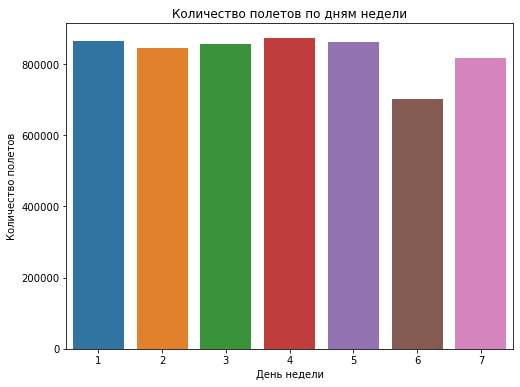

In [25]:
# График столбчатой диаграммы для количества полетов по дням недели
plt.figure(figsize=(8, 6))
sns.countplot(x='DAY_OF_WEEK', data=dataset)
plt.xlabel('День недели')
plt.ylabel('Количество полетов')
plt.title('Количество полетов по дням недели')
plt.show()

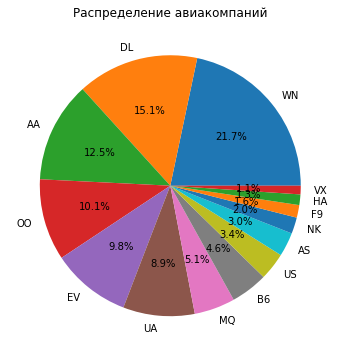

In [26]:
# График круговой диаграммы для распределения авиакомпаний
plt.figure(figsize=(8, 6))
dataset['AIRLINE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Распределение авиакомпаний')
plt.show()

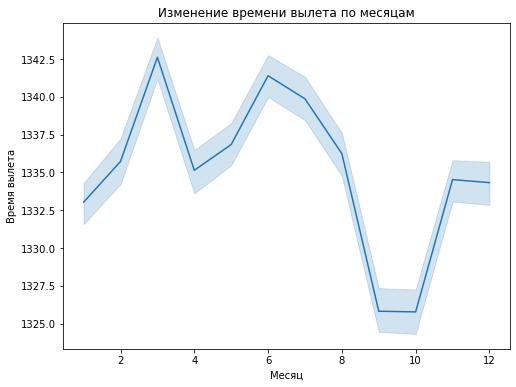

In [27]:
# Линейный график для изменения времени вылета по месяцам
plt.figure(figsize=(8, 6))
sns.lineplot(x='MONTH', y='DEPARTURE_TIME', data=dataset)
plt.xlabel('Месяц')
plt.ylabel('Время вылета')
plt.title('Изменение времени вылета по месяцам')
plt.show()

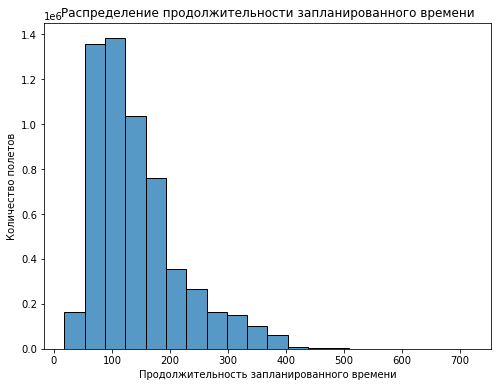

In [28]:
# Гистограмма для распределения продолжительности запланированного времени
plt.figure(figsize=(8, 6))
sns.histplot(dataset['SCHEDULED_TIME'], bins=20)
plt.xlabel('Продолжительность запланированного времени')
plt.ylabel('Количество полетов')
plt.title('Распределение продолжительности запланированного времени')
plt.show()

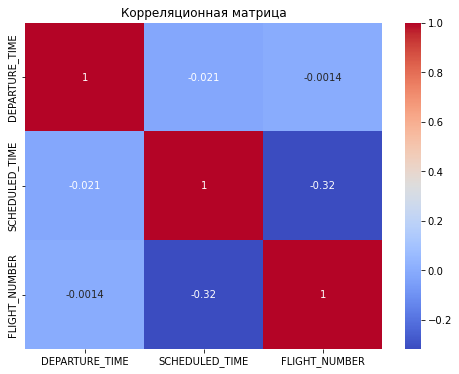

In [29]:
# Корреляционная матрица для связи различных числовых переменных
numerical_vars = ['DEPARTURE_TIME', 'SCHEDULED_TIME', 'FLIGHT_NUMBER']
correlation_matrix = dataset[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()